In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
def load_image(image_path):

    """
    Carga una imagen en escala de grises.
    :param image_path: Ruta de la imagen.
    :return: Imagen cargada o None si no se pudo cargar.

    
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: No se pudo cargar la imagen '{image_path}'.")
        return None
    return image

### Imagen con ruido de sal y pimienta

In [ ]:
image = load_image('Imagenes/RisasPimientaSal.png')
if image is None:
    print("No se pudo cargar la imagen.")

Imagen con sombras

In [ ]:
image_shadows = load_image('Imagenes/Castle.jpg')

Imagen con Ruido Gaussiano

In [ ]:
gaussian_image = load_image('Imagenes/GaussianImage.jpg')

In [22]:
cv2.imshow('Imagen Original', image_shadows)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Filtro de Media

📌 Definición
El Filtro de Media es una técnica de procesamiento de imágenes que suaviza la imagen reduciendo las variaciones de intensidad entre píxeles vecinos. Es un filtro lineal que reemplaza el valor de cada píxel por el promedio de los valores de los píxeles en su vecindad.


### 📐 Fórmula Matemática

$$
I'(x, y) = \frac{1}{mn} \sum_{i=-a}^{a} \sum_{j=-b}^{b} I(x+i, y+j)
$$

**Donde:**

* $I'(x, y)$: es el valor del píxel filtrado en la posición $(x, y)$.
* $m \times n$: es el tamaño del kernel (por ejemplo, 3x3).
* $a = \frac{m - 1}{2}$, $b = \frac{n - 1}{2}$


In [23]:
# Filtro de media
filtered_image = cv2.blur(image, (5, 5))

(-0.5, 300.5, 349.5, -0.5)

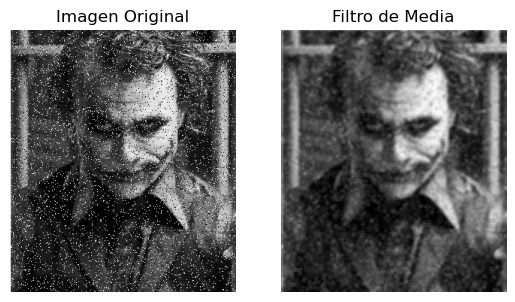

In [24]:
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Media')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

El filtro de Media funciona mejor para el ruido Gaussiano, no es tan eficaz para el ruido de sal y pimienta de la imagen. Parece difuminarlo y hay un efecto de "manchas".

In [25]:
filtered_image = cv2.blur(gaussian_image, (5, 5))

(-0.5, 223.5, 223.5, -0.5)

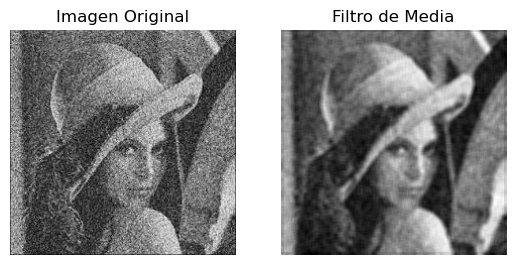

In [26]:
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Media')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

# Filtro de Mediana

### 📐 Fórmula Matemática

$$
I'(x, y) = \text{mediana}\left\{ I(i, j) \,\big|\, (i,j) \in \text{vecindad de } (x, y) \right\}$$

**Donde:**

* $I'(x, y)$: es el valor del píxel filtrado en la posición $(x, y)$.
* $I(i, j)$: es el valor de un píxel en la vecindad.
* $\text{vecindad de } (x, y)$: es la ventana de píxeles alrededor de $(x, y)$, típicamente $3 \times 3$, $5 \times 5$, etc.

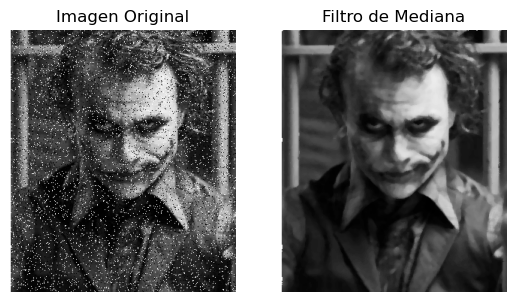

AttributeError: 'numpy.ndarray' object has no attribute 'Save'

In [ ]:
median_filtered_image = cv2.medianBlur(image, 5)

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Mediana')
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')
plt.show()

# Filtro Logarítmico

---

## Filtro Logarítmico

El **filtro logarítmico** no es un filtro espacial tradicional (como los filtros de media o mediana), sino una **transformación puntual**. Su principal objetivo es **realzar los detalles en las zonas oscuras** de una imagen. Lo logra al aprovechar la propiedad matemática del logaritmo que **expande los valores pequeños y comprime los grandes**.

Es ideal cuando tienes imágenes con un **gran rango dinámico** y se quiere destacar las sombras o áreas poco iluminadas.

---

### 📐 Fórmula Matemática

La transformación logarítmica se describe con la siguiente fórmula:

$$s = c \cdot \log(1 + r)$$

**Donde:**
* $s$: es el valor del píxel de salida.
* $c$: es una constante de escala.
* $r$: es el valor del píxel de entrada (generalmente normalizado entre 0 y 1, o 0 a 255).

La constante $c$ a menudo se calcula para normalizar la salida a un rango específico (por ejemplo, 8 bits, 0-255). Una forma común de calcularla es:

$$c = \frac{255}{\log(1 + r_{\text{max}})}$$

Donde $r_{\text{max}}$ es el valor máximo posible del píxel de entrada (por ejemplo, 255 para una imagen de 8 bits).

---

### 🧠 Ejemplo Conceptual

Consideremos los siguientes valores de píxeles: [10, 50, 100, 200]

Si aplicamos la fórmula logarítmica (asumiendo que $r_{\text{max}} = 255$, entonces $c = \frac{255}{\log(1 + 255)} \approx \frac{255}{\log(256)}$):

$$s = 255 \cdot \frac{\log(1 + r)}{\log(256)}$$

Los resultados aproximados serían:

* Si $r = 10 \Rightarrow s \approx 73$
* Si $r = 50 \Rightarrow s \approx 144$
* Si $r = 100 \Rightarrow s \approx 187$
* Si $r = 200 \Rightarrow s \approx 236$

Como se peude observar, el valor inicial de **10 se "expande" mucho más** en relación con su valor original (de 10 a 73) que el valor de 200 (de 200 a 236). Esto demuestra cómo el filtro logarítmico **realza los detalles en las zonas oscuras** (valores de píxeles bajos) de la imagen.


Empezamos por convertir a float (ya que trabajaremos con decimales). Además calculamos el **ln(1+r)**

In [ ]:
shadows_float = image_shadows.astype(np.float32)
shadows_log = np.log(shadows_float + 1)

Estiramos la imagen para ocupar todo el espacio desde 0 a 255 (luminosidad)

In [ ]:
shadows_normalized_log = cv2.normalize(
    shadows_log, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
shadows_final = np.uint8(shadows_normalized_log)



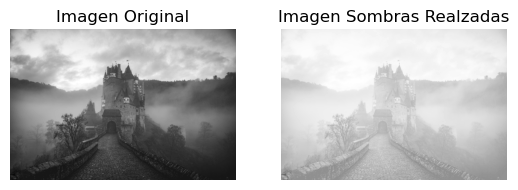

In [ ]:
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image_shadows, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Sombras Realzadas')
plt.imshow(shadows_final, cmap='gray')
plt.axis('off')

plt.show()

Realzados lso detalles oscuros y comprimidos los claros

# Filtro de Cuadro Normalizado

### 📌 **Definición**

Este filtro es muy parecido al **filtro de media**, pero con una diferencia clave: el kernel está normalizado explícitamente para que todos los valores sumen 1. Es un tipo de **filtro de convolución** que calcula el promedio de los píxeles en una ventana, pero usa una matriz uniforme y normalizada.

Se llama "cuadro" porque usa un **kernel cuadrado de tamaño fijo**, como $3 \times 3$, $5 \times 5$, etc.

---

### 📐 **Fórmula Matemática**

El kernel de un filtro de cuadro normalizado de tamaño $k \times k$ es:

$$
K = \frac{1}{k^2}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
$$

Y se aplica por convolución:

$$I'(x, y) = \sum_{i=-a}^{a} \sum_{j=-b}^{b} K(i,j) \cdot I(x+i, y+j)$$

Es idéntico al filtro de media, pero más explícito y configurable en OpenCV.

---

### 🧠 **Ejemplo Conceptual**

Si se tiene un kernel de $3 \times 3$:

$$
K = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
$$

Al aplicarlo sobre una imagen, produce un **suavizado por promedio uniforme**, como el filtro de media.

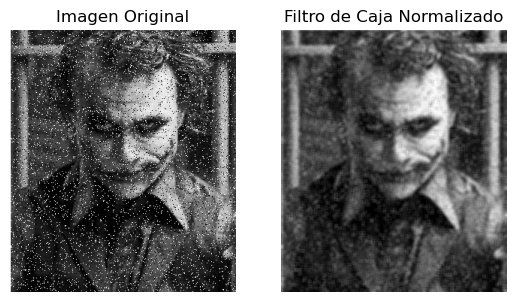

In [ ]:
box_normalized = cv2.boxFilter(image, ddepth=-1, ksize=(5, 5), normalize=True)
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Caja Normalizado')
plt.imshow(box_normalized, cmap='gray')
plt.axis('off')

plt.show()

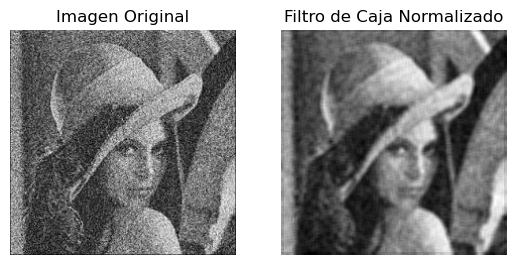

In [ ]:
box_normalized = cv2.boxFilter(gaussian_image, ddepth=-1, ksize=(5, 5), normalize=True)

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Caja Normalizado')
plt.imshow(box_normalized, cmap='gray')
plt.axis('off')

plt.show()


# Filtro Gaussiano

In [ ]:
gaussian_filtered_image = cv2.GaussianBlur(gaussian_image, (5, 5), sigmaX=4)

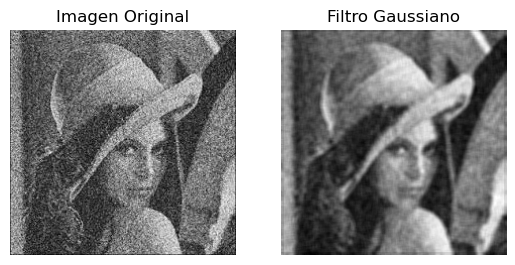

In [ ]:
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro Gaussiano')
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.axis('off')

plt.show()